In [1]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

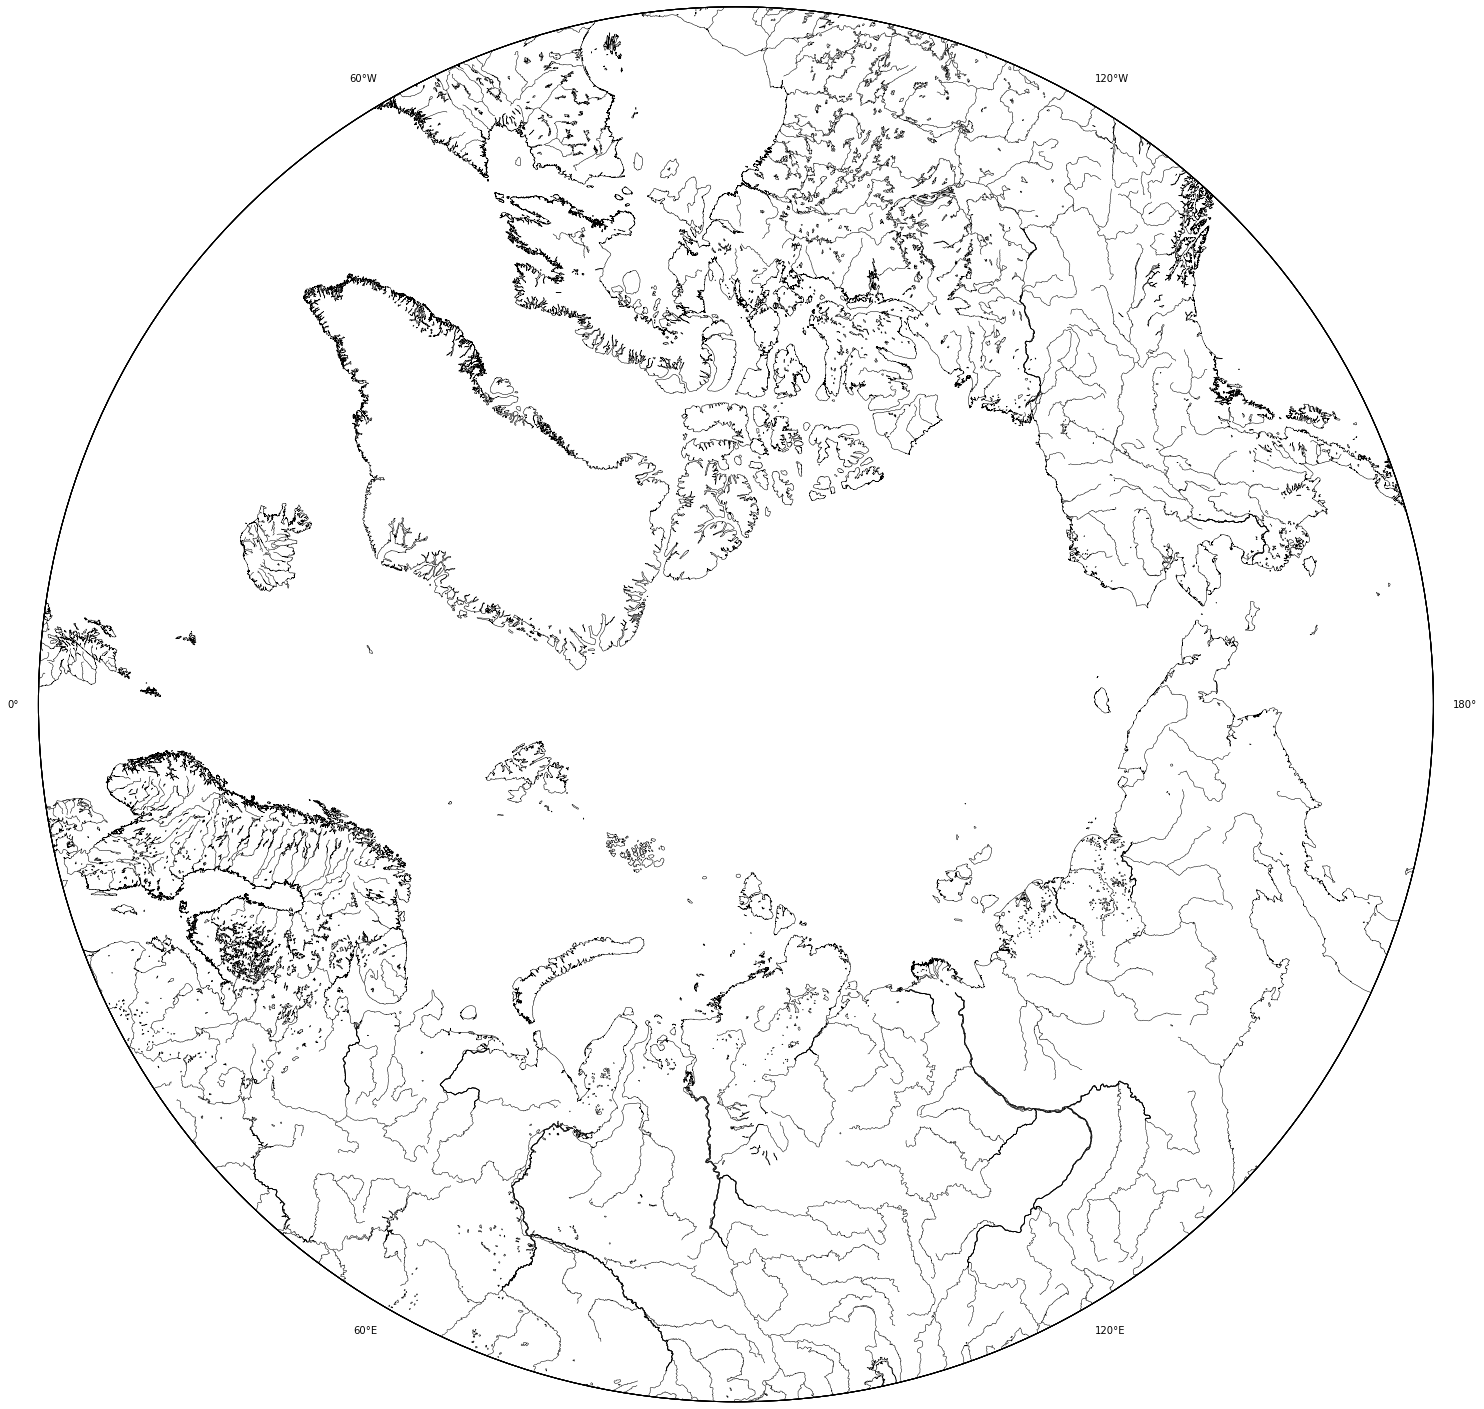

In [5]:
fig=plt.figure(figsize=(25, 25));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='h', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
#proj.fillcontinents(color='gray', lake_color=None)
proj.drawcoastlines(linewidth=0.5, color='k')
proj.drawrivers(color='k')

fig.savefig('river_map.png', dpi=600, orientation='portrait', papertype='a4', format='png',
            transparent=True, bbox_inches='tight', pad_inches=0.01)

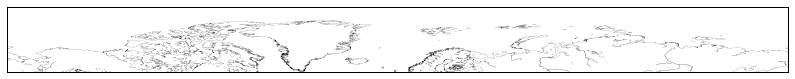

In [9]:
fig=plt.figure(figsize=(14, 14));
ax = fig.gca()
proj=Basemap(projection='cyl', resolution='i', llcrnrlat=60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax)
proj.drawcoastlines(linewidth=0.1, color='k')

fig.savefig('Arctic_map.png', dpi=600, orientation='portrait', papertype='a4', format='png',
            transparent=True, bbox_inches='tight', pad_inches=0)